Pytorch Optimizasyon Yapilmasi

In [1]:
%cd /content/sample_data

/content/sample_data


In [3]:
import torch
import pandas as pd
import numpy as np

In [4]:
data=pd.read_excel('salary.xlsx')

In [5]:
data.head()

,deneyim,maas
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
deneyim=torch.tensor(data['deneyim'],dtype=float)

In [7]:
maas=torch.tensor(data['maas'],dtype=float)

In [8]:
def model_2(deneyim,w1,w2,b):
  return w1*deneyim**2+w2*deneyim+b

In [9]:
def kayip_fonk(tahmin,gercek):
  farklar_karesi=(tahmin-gercek)**2
  return farklar_karesi.mean()

In [38]:
parametreler=torch.tensor([1.0,1.0,0.0],requires_grad=True)

In [11]:
import torch.optim as optim

In [13]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [39]:
optim_araci=optim.Adam([parametreler],lr=0.1)

In [41]:
kayip_list=[]
for epoch in range(10000):
  maas_tahmin=model_2(deneyim,*parametreler)
  kayip=kayip_fonk(maas_tahmin,maas)

  kayip.backward()
  optim_araci.step()
  optim_araci.zero_grad()

  kayip_list.append(kayip.item())



In [17]:
print(parametreler)

tensor([1.0506, 1.0506, 0.0506], requires_grad=True)


In [31]:
import matplotlib.pyplot as plt

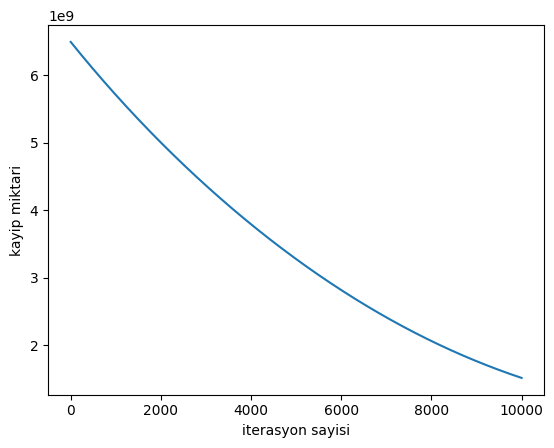

In [42]:
plt.plot(torch.arange(10000),kayip_list)
plt.xlabel('iterasyon sayisi')
plt.ylabel('kayip miktari')
plt.show()

In [32]:
kayip

tensor(5.7099e+09, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [33]:
kayip.item()

5709943617.296276

## İkinci El Araba Fiyati Tahmini

In [43]:
car=pd.read_csv('train.csv')

In [44]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [49]:
car['Name'][0]

'Maruti Wagon R LXI CNG'

In [46]:
type(car['Name'][0])

str

In [47]:
car['Name'][0].split()

['Maruti', 'Wagon', 'R', 'LXI', 'CNG']

In [48]:
car['Name'][0].split()[0]

'Maruti'

In [50]:
car.shape

(6019, 13)

In [51]:
marka=[]
for i in range(car.shape[0]):
  marka.append(car['Name'][i].split()[0])

In [53]:
marka[:10]

['Maruti',
 'Hyundai',
 'Honda',
 'Maruti',
 'Audi',
 'Hyundai',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata']

In [55]:
len(np.unique(np.array(marka)))

31

In [56]:
marka_one_hot=pd.get_dummies(marka,dtype=float)

In [57]:
marka_one_hot.head()

,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
location_one_hot=pd.get_dummies(car['Location'],dtype=float)

In [59]:
age=2024-car['Year']

In [62]:
type(age)

pandas.core.series.Series

In [63]:
fuel_one_hot=pd.get_dummies(car['Fuel_Type'],dtype=float)

In [64]:
trans_one_hot=pd.get_dummies(car['Transmission'],dtype=float)

In [65]:
owner_one_hot=pd.get_dummies(car['Owner_Type'],dtype=float)

In [70]:
float(car['Mileage'][0].split()[0])

26.6

In [76]:
mil=[]
for i in range(car.shape[0]):
  try:
    mil.append(float(car['Mileage'][i].split()[0]))
  except:
    mil.append(np.mean(mil))

In [83]:
np.isnan(car['Mileage'][4446])

True

In [74]:
print(i)

4446


In [79]:
mil[4446]

18.099167791273054

In [81]:
engine=[]
for i in range(car.shape[0]):
  try:
    engine.append(float(car['Engine'][i].split()[0]))
  except:
    engine.append(np.mean(engine))

In [82]:
power=[]
for i in range(car.shape[0]):
  try:
    power.append(float(car['Power'][i].split()[0]))
  except:
    power.append(np.mean(power))

In [87]:
seats=[]
for i in range(car.shape[0]) :
  if np.isnan(car['Seats'][i]) or car['Seats'][i]==0:
    seats.append(np.mean(seats))
  else:
    seats.append(car['Seats'][i])


In [90]:
veri=pd.concat([marka_one_hot,location_one_hot,
                age,
                car['Kilometers_Driven'],
                fuel_one_hot,trans_one_hot,owner_one_hot,
                pd.Series(mil),
                pd.Series(engine),
                pd.Series(power),
                pd.Series(seats)],axis=1)


In [91]:
veri.shape

(6019, 59)

In [92]:
veri.head()

,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Automatic,Manual,First,Fourth & Above,Second,Third,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,26.60,998.0,58.16,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,19.67,1582.0,126.20,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,18.20,1199.0,88.70,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,20.77,1248.0,88.76,7.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,15.20,1968.0,140.80,5.0


In [93]:
hedef=car['Price']

In [94]:
type(veri)

pandas.core.frame.DataFrame

In [96]:
veri_torch=torch.from_numpy(np.array(veri)).float()
hedef_torch=torch.from_numpy(np.array(hedef)).float()

In [97]:
veri_torch.shape

torch.Size([6019, 59])

In [100]:
hedef_torch.shape

torch.Size([6019])

In [103]:
def model(X,W,b):
  return X@W+b
  #return torch.matmul(X,W)+b

In [102]:
def kayip_fonk(tahmin,gercek):
  farklar_karesi=(tahmin-gercek)**2
  return farklar_karesi.mean()

In [110]:
#Baslangic W ve b degerleri oluşturalim
W=torch.ones(veri_torch.shape[1],requires_grad=True)
b=torch.tensor([0.0],requires_grad=True)

In [111]:
optim_araci=optim.Adam([W,b],lr=0.01)

In [112]:
kayip_list=[]
for epoch in range(10000):
  tahmin=model(veri_torch,W,b)
  kayip=kayip_fonk(tahmin,hedef_torch)

  kayip.backward()
  optim_araci.step()
  optim_araci.zero_grad()

  #print(f'Epoch: {epoch} icin kayip miktari: {kayip:.3f}')
  kayip_list.append(kayip.item())

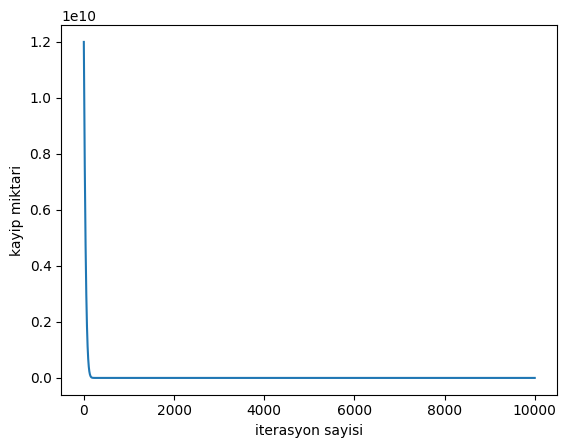

In [113]:
plt.plot(torch.arange(10000),kayip_list)
plt.xlabel('iterasyon sayisi')
plt.ylabel('kayip miktari')
plt.show()